<a href="https://colab.research.google.com/github/patero22/GNN-Reaserch_project/blob/main/Kopia_notatnika_nasze_notatki_na_intela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalacja wymaganych pakietów.
import os
import torch

# Ustawienie środowiskowej zmiennej TORCH na wersję aktualnie używaną przez torch.
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# Instalacja torch-scatter z podanego źródła zgodnie z wersją torch.
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html

# Instalacja torch-sparse z podanego źródła zgodnie z wersją torch.
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html

# Instalacja pytorch_geometric z repozytorium GitHub.
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Definicja funkcji pomocniczej do wizualizacji.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    """
    Funkcja do wizualizacji zanurzenia w przestrzeni 2D za pomocą TSNE.

    Parametry:
    - h: Tensor zanurzeń do wizualizacji.
    - color: Tablica kolorów odpowiadających punktom w tensorze h.
    """

    # Zastosowanie TSNE do zanurzenia w przestrzeni 2D.
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    # Tworzenie wykresu.
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    # Wizualizacja punktów na wykresie.
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()


2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Podsumowanie:

    Instalacja wymaganych pakietów:
    Importujemy niezbędne biblioteki,ustawiamy zmienną środowiskową dla wersji torch oraz instalujemy
    dodatkowe pakiety niezbędne do pracy z grafami w PyTorch.

    Definicja funkcji visualize:
    Tworzymy funkcję, która przyjmuje zanurzenia (tensor h) i kolory dla punktów.
    Następnie używamy algorytmu TSNE do zredukowania wymiarowości do 2D i wizualizujemy
     wynikowy zanurzenie za pomocą wykresu punktowego.

#sklearn.manifold & TSNE



In [ ]:
"""
sklearn.manifold to moduł w bibliotece scikit-learn w języku Python. Biblioteka scikit-learn jest popularnym narzędziem do analizy danych i uczenia maszynowego w Pythonie. Moduł sklearn.manifold zawiera implementacje różnych technik redukcji wymiarowości i wizualizacji danych, które są przydatne w eksploracyjnej analizie danych oraz w przypadkach, gdy chcemy zredukować wymiar naszych danych do celów wizualizacji lub przetwarzania.
Techniki redukcji wymiarowości, które są dostępne w module sklearn.manifold, obejmują:

t-SNE (t-distributed Stochastic Neighbor Embedding): Jest to technika wizualizacji danych, która ma na celu odwzorowanie wysokowymiarowych danych w przestrzeni o mniejszej liczbie wymiarów, zwykle dwóch lub trzech, zachowując przy tym jak najwięcej struktury danych. Jest szczególnie przydatna do wizualizacji klastrów w danych.

Isomap (Isometric Mapping): Metoda ta tworzy graf przyległości na podstawie danych i znajduje w nim najkrótsze ścieżki między każdą parą punktów. Następnie odwzorowuje te odległości w niższej wymiarowości, zachowując przy tym ich strukturę geometryczną.

Locally Linear Embedding (LLE): Metoda ta polega na znajdowaniu lokalnie liniowych przybliżeń dla każdego punktu danych, a następnie odwzorowaniu tych przybliżeń w niższej wymiarowości. Jest to przydatna technika do odkrywania ukrytych struktur w danych.

MDS (Multidimensional Scaling): Jest to technika, która odwzorowuje podobieństwa między zestawami danych w niższej wymiarowości, zachowując przy tym jak najwięcej informacji o odległościach między punktami.

Te techniki są przydatne do wizualizacji danych, wykrywania struktur i klastrowania oraz do przygotowania danych przed zastosowaniem algorytmów uczenia maszynowego. Dzięki możliwości redukcji wymiarów, możemy lepiej zrozumieć zależności w danych i przyspieszyć procesy analizy danych.
"""

'\nsklearn.manifold to moduł w bibliotece scikit-learn w języku Python. Biblioteka scikit-learn jest popularnym narzędziem do analizy danych i uczenia maszynowego w Pythonie. Moduł sklearn.manifold zawiera implementacje różnych technik redukcji wymiarowości i wizualizacji danych, które są przydatne w eksploracyjnej analizie danych oraz w przypadkach, gdy chcemy zredukować wymiar naszych danych do celów wizualizacji lub przetwarzania.\nTechniki redukcji wymiarowości, które są dostępne w module sklearn.manifold, obejmują:\n\nt-SNE (t-distributed Stochastic Neighbor Embedding): Jest to technika wizualizacji danych, która ma na celu odwzorowanie wysokowymiarowych danych w przestrzeni o mniejszej liczbie wymiarów, zwykle dwóch lub trzech, zachowując przy tym jak najwięcej struktury danych. Jest szczególnie przydatna do wizualizacji klastrów w danych.\n\nIsomap (Isometric Mapping): Metoda ta tworzy graf przyległości na podstawie danych i znajduje w nim najkrótsze ścieżki między każdą parą pu

# Node Classification with Graph Neural Networks

[Previous: Introduction: Hands-on Graph Neural Networks](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8)

This tutorial will teach you how to apply **Graph Neural Networks (GNNs) to the task of node classification**.
Here, we are given the ground-truth labels of only a small subset of nodes, and want to infer the labels for all the remaining nodes (*transductive learning*).

To demonstrate, we make use of the `Cora` dataset, which is a **citation network** where nodes represent documents.
Each node is described by a 1433-dimensional bag-of-words feature vector.
Two documents are connected if there exists a citation link between them.
The task is to infer the category of each document (7 in total).

This dataset was first introduced by [Yang et al. (2016)](https://arxiv.org/abs/1603.08861) as one of the datasets of the `Planetoid` benchmark suite.
We again can make use [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric) for an easy access to this dataset via [`torch_geometric.datasets.Planetoid`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.Planetoid):

In [ ]:
from torch_geometric.datasets import Planetoid  # Importowanie klasy Planetoid z modułu torch_geometric.datasets
from torch_geometric.transforms import NormalizeFeatures  # Importowanie klasy NormalizeFeatures z modułu torch_geometric.transforms

# Pobieranie zbioru danych Planetoid o nazwie Cora z użyciem transformacji NormalizeFeatures
dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()  # Wydruk pustej linii w celu oddzielenia wyników
print(f'Dataset: {dataset}:')  # Wydruk informacji o zbiorze danych
print('======================')  # Wydruk separatora
print(f'Number of graphs: {len(dataset)}')  # Wydruk liczby grafów w zbiorze danych
print(f'Number of features: {dataset.num_features}')  # Wydruk liczby cech w zbiorze danych
print(f'Number of classes: {dataset.num_classes}')  # Wydruk liczby klas w zbiorze danych

data = dataset[0]  # Pobranie pierwszego obiektu grafu z zbioru danych.

print()  # Wydruk pustej linii w celu oddzielenia wyników
print(data)  # Wydruk informacji o pierwszym grafie
print('===========================================================================================================')  # Wydruk separatora

# Zbieranie niektórych statystyk o grafie.
print(f'Number of nodes: {data.num_nodes}')  # Wydruk liczby węzłów w grafie
print(f'Number of edges: {data.num_edges}')  # Wydruk liczby krawędzi w grafie
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')  # Wydruk średniego stopnia węzła w grafie
print(f'Number of training nodes: {data.train_mask.sum()}')  # Wydruk liczby węzłów treningowych
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')  # Wydruk wskaźnika etykiet węzłów treningowych
print(f'Has isolated nodes: {data.has_isolated_nodes()}')  # Wydruk informacji o izolowanych węzłach
print(f'Has self-loops: {data.has_self_loops()}')  # Wydruk informacji o pętlach własnych
print(f'Is undirected: {data.is_undirected()}')  # Wydruk informacji o grafie nieskierowanym

Processing...



Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Done!


Overall, this dataset is quite similar to the previously used [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) network.
We can see that the `Cora` network holds 2,708 nodes and 10,556 edges, resulting in an average node degree of 3.9.
For training this dataset, we are given the ground-truth categories of 140 nodes (20 for each class).
This results in a training node label rate of only 5%.

In contrast to `KarateClub`, this graph holds the additional attributes `val_mask` and `test_mask`, which denotes which nodes should be used for validation and testing.
Furthermore, we make use of **[data transformations](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-transforms) via `transform=NormalizeFeatures()`**.
Transforms can be used to modify your input data before inputting them into a neural network, *e.g.*, for normalization or data augmentation.
Here, we [row-normalize](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.NormalizeFeatures) the bag-of-words input feature vectors.

We can further see that this network is undirected, and that there exists no isolated nodes (each document has at least one citation).

An artificial neural network (ANN) is a machine learning model inspired by the structure and function of the human brain's interconnected network of neurons. It consists of interconnected nodes called artificial neurons, organized into layers. Information flows through the network, with each neuron processing input signals and producing an output signal that influences other neurons in the network.

A multi-layer perceptron (MLP) is a type of artificial neural network consisting of multiple layers of neurons. The neurons in the MLP typically use nonlinear activation functions, allowing the network to learn complex patterns in data. MLPs are significant in machine learning because they can learn nonlinear relationships in data, making them powerful models for tasks such as classification, regression, and pattern recognition.


## Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a document solely based on its content, *i.e.* its bag-of-words feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [ ]:
import torch  # Importuje moduł torch, który jest biblioteką do obliczeń numerycznych w PyTorch.
from torch.nn import Linear  # Importuje klasę Linear z modułu torch.nn, która reprezentuje warstwę liniową.
import torch.nn.functional as F  # Importuje funkcje aktywacji i inne funkcje pomocnicze z modułu torch.nn.functional.

class MLP(torch.nn.Module):  # Definiuje klasę MLP (Multi-Layer Perceptron), która dziedziczy po klasie torch.nn.Module.
    def __init__(self, hidden_channels):  # Definiuje konstruktor klasy MLP z parametrem hidden_channels.
        super().__init__()  # Wywołuje konstruktor klasy nadrzędnej (torch.nn.Module).
        torch.manual_seed(12345)  # Ustawia ziarno generatora liczb losowych w PyTorch dla powtarzalności wyników.
        self.lin1 = Linear(dataset.num_features, hidden_channels)  # Inicjalizuje pierwszą warstwę liniową z dataset.num_features wejściami i hidden_channels wyjściami.
        self.lin2 = Linear(hidden_channels, dataset.num_classes)  # Inicjalizuje drugą warstwę liniową z hidden_channels wejściami i dataset.num_classes wyjściami.

    def forward(self, x):  # Definiuje metodę forward dla przekazywania danych przez model.
        x = self.lin1(x)  # Przekazuje dane przez pierwszą warstwę liniową.
        x = x.relu()  # Aktywuje dane przy użyciu funkcji ReLU (Rectified Linear Unit).
        x = F.dropout(x, p=0.5, training=self.training)  # Stosuje warstwę dropout do danych z prawdopodobieństwem 0.5 w czasie treningu.
        x = self.lin2(x)  # Przekazuje dane przez drugą warstwę liniową.
        return x  # Zwraca przetworzone dane.

model = MLP(hidden_channels=16)  # Tworzy instancję modelu MLP z 16 ukrytymi kanałami.
print(model)  # Wyświetla architekturę modelu.



MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Klasa Linear w PyTorch reprezentuje warstwę liniową, która wykonuje operację mnożenia macierzowego na danych wejściowych. Operacja ta jest zdefiniowana jako:

output=input×weightT+biasoutput=input×weightT+bias

    input: Dane wejściowe (w naszym przypadku cechy wierzchołków).
    weight: Macierz wag.
    bias: Wektor obciążeń.

Logika za argumentami dla Linear w MLP

    Pierwsza warstwa liniowa (self.lin1):

        Wejście: dataset.num_features

        Argument dataset.num_features określa liczbę cech dla każdego wierzchołka w grafie. W GNN cechy te mogą reprezentować różne właściwości wierzchołków, takie jak etykiety, atrybuty czy reprezentacje.

        Wyjście: hidden_channels

        Argument hidden_channels określa rozmiar wyjścia z tej warstwy. Ta wartość kontroluje liczbę "ukrytych" jednostek w warstwie, co pozwala modelowi na naukę różnorodnych i złożonych reprezentacji cech wierzchołków.

    Druga warstwa liniowa (self.lin2):

        Wejście: hidden_channels

        Ta warstwa przyjmuje dane wyjściowe z poprzedniej warstwy liniowej jako wejście. Dzięki temu model może przekształcić i kompresować informacje z poprzedniej warstwy.

        Wyjście: dataset.num_classes

        Argument dataset.num_classes określa liczbę klas w problemie klasyfikacji. Wyjście z tej warstwy będzie reprezentować rozkład prawdopodobieństwa przynależności wierzchołków do poszczególnych klas.

Podsumowanie

    Warstwa liniowa 1: Przetwarza cechy wierzchołków zgodnie z ich licznością i przekształca je w ukryte reprezentacje o rozmiarze hidden_channels.

    Warstwa liniowa 2: Przekształca ukryte reprezentacje z pierwszej warstwy do rozkładu prawdopodobieństwa przynależności do dataset.num_classes klas.

Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [ ]:
from IPython.display import Javascript  # Importuje moduł Javascript z biblioteki IPython do manipulowania wyjściami w notatniku.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)  # Tworzy instancję modelu MLP z 16 ukrytymi kanałami.
criterion = torch.nn.CrossEntropyLoss()  # Definiuje kryterium straty jako CrossEntropyLoss.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Definiuje optymalizator Adam z parametrami modelu i współczynnikiem uczenia się 0.01 oraz regularyzacją L2 (weight decay) 5e-4.

def train():
    model.train()  # Ustawia model w trybie treningowym.
    optimizer.zero_grad()  # Zeruje gradienty.
    out = model(data.x)  # Przeprowadza pojedynczą iterację przekazywania danych do przodu.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Oblicza stratę tylko na podstawie węzłów treningowych.
    loss.backward()  # Oblicza gradienty.
    optimizer.step()  # Aktualizuje parametry na podstawie gradientów.
    return loss  # Zwraca wartość straty.

def test():
    model.eval()  # Ustawia model w trybie ewaluacji.
    out = model(data.x)  # Przeprowadza przekazywanie danych do przodu.
    pred = out.argmax(dim=1)  # Wybiera klasę z największą wartością prawdopodobieństwa.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Sprawdza zgodność z rzeczywistymi etykietami testowymi.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Oblicza wskaźnik dokładności testowej.
    return test_acc  # Zwraca dokładność testową.

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


As one can see, our MLP performs rather bad with only about 59% test accuracy.
But why does the MLP do not perform better?
The main reason for that is that this model suffers from heavy overfitting due to only having access to a **small amount of training nodes**, and therefore generalizes poorly to unseen node representations.

It also fails to incorporate an important bias into the model: **Cited papers are very likely related to the category of a document**.
That is exactly where Graph Neural Networks come into play and can help to boost the performance of our model.



## Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single `Linear` layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [ ]:
from torch_geometric.nn import GCNConv  # Importuje klasę GCNConv z modułu torch_geometric.nn, która reprezentuje warstwę konwolucyjną GCN.

class GCN(torch.nn.Module):  # Definiuje klasę GCN, która dziedziczy po klasie torch.nn.Module.
    def __init__(self, hidden_channels):  # Definiuje konstruktor klasy GCN z parametrem hidden_channels.
        super().__init__()  # Wywołuje konstruktor klasy nadrzędnej (torch.nn.Module).
        torch.manual_seed(1234567)  # Ustawia ziarno generatora liczb losowych w PyTorch dla powtarzalności wyników.
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)  # Inicjalizuje pierwszą warstwę konwolucyjną GCN z dataset.num_features wejściami i hidden_channels wyjściami.
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)  # Inicjalizuje drugą warstwę konwolucyjną GCN z hidden_channels wejściami i dataset.num_classes wyjściami.

    def forward(self, x, edge_index):  # Definiuje metodę forward dla przekazywania danych przez model.
        x = self.conv1(x, edge_index)  # Przeprowadza konwolucję na danych wejściowych x z wykorzystaniem pierwszej warstwy konwolucyjnej GCN.
        x = x.relu()  # Aktywuje dane przy użyciu funkcji ReLU (Rectified Linear Unit).
        x = F.dropout(x, p=0.5, training=self.training)  # Stosuje warstwę dropout do danych z prawdopodobieństwem 0.5 w czasie treningu.
        x = self.conv2(x, edge_index)  # Przeprowadza konwolucję na danych wyjściowych z pierwszej warstwy konwolucyjnej x z wykorzystaniem drugiej warstwy konwolucyjnej GCN.
        return x  # Zwraca przetworzone dane.

model = GCN(hidden_channels=16)  # Tworzy instancję modelu GCN z 16 ukrytymi kanałami.
print(model)  # Wyświetla architekturę modelu.

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

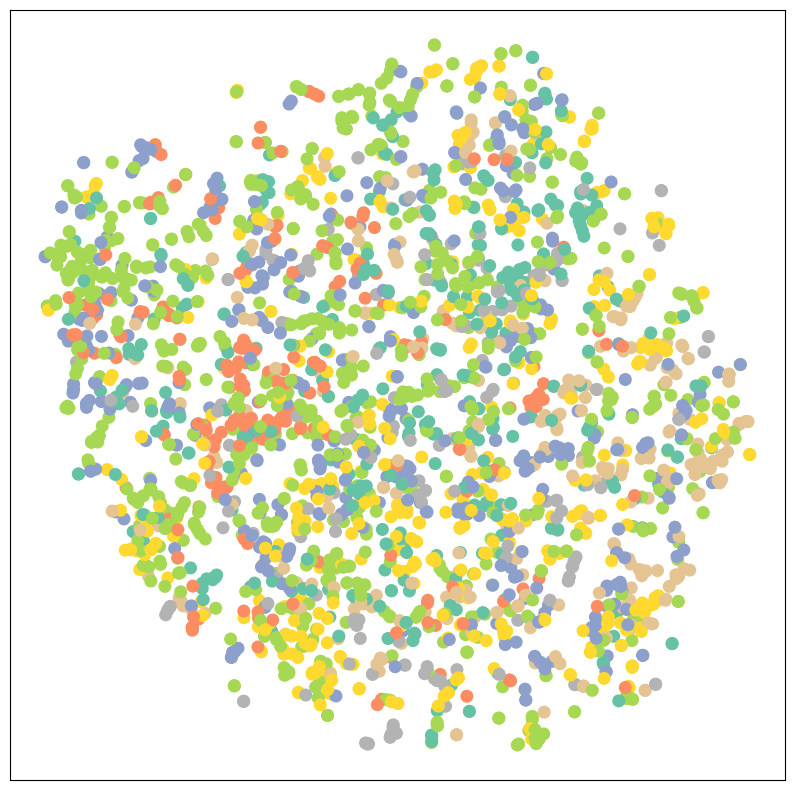

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

We certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9463
Epoch: 002, Loss: 1.9409
Epoch: 003, Loss: 1.9343
Epoch: 004, Loss: 1.9275
Epoch: 005, Loss: 1.9181
Epoch: 006, Loss: 1.9086
Epoch: 007, Loss: 1.9015
Epoch: 008, Loss: 1.8933
Epoch: 009, Loss: 1.8808
Epoch: 010, Loss: 1.8685
Epoch: 011, Loss: 1.8598
Epoch: 012, Loss: 1.8482
Epoch: 013, Loss: 1.8290
Epoch: 014, Loss: 1.8233
Epoch: 015, Loss: 1.8057
Epoch: 016, Loss: 1.7966
Epoch: 017, Loss: 1.7825
Epoch: 018, Loss: 1.7617
Epoch: 019, Loss: 1.7491
Epoch: 020, Loss: 1.7310
Epoch: 021, Loss: 1.7147
Epoch: 022, Loss: 1.7056
Epoch: 023, Loss: 1.6954
Epoch: 024, Loss: 1.6697
Epoch: 025, Loss: 1.6538
Epoch: 026, Loss: 1.6312
Epoch: 027, Loss: 1.6161
Epoch: 028, Loss: 1.5899
Epoch: 029, Loss: 1.5711
Epoch: 030, Loss: 1.5576
Epoch: 031, Loss: 1.5393
Epoch: 032, Loss: 1.5137
Epoch: 033, Loss: 1.4948
Epoch: 034, Loss: 1.4913
Epoch: 035, Loss: 1.4698
Epoch: 036, Loss: 1.3998
Epoch: 037, Loss: 1.4041
Epoch: 038, Loss: 1.3761
Epoch: 039, Loss: 1.3631
Epoch: 040, Loss: 1.3258


After training the model, we can check its test accuracy:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8150


**There it is!**
By simply swapping the linear layers with GNN layers, we can reach **81.5% of test accuracy**!
This is in stark contrast to the 59% of test accuracy obtained by our MLP, indicating that relational information plays a crucial role in obtaining better performance.

We can also verify that once again by looking at the output embeddings of our **trained** model, which now produces a far better clustering of nodes of the same category.

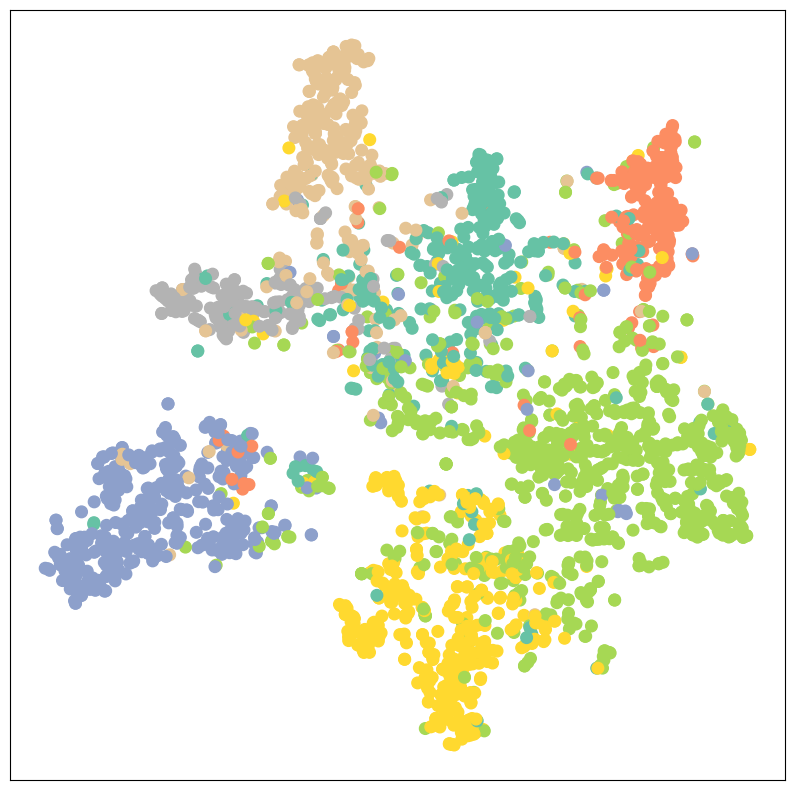

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## Conclusion

In this chapter, you have seen how to apply GNNs to real-world problems, and, in particular, how they can effectively be used for boosting a model's performance.
In the next section, we will look into how GNNs can be used for the task of graph classification.

[Next: Graph Classification with Graph Neural Networks](https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb)

## (Optional) Exercises

1. To achieve better model performance and to avoid overfitting, it is usually a good idea to select the best model based on an additional validation set.
The `Cora` dataset provides a validation node set as `data.val_mask`, but we haven't used it yet.
Can you modify the code to select and test the model with the highest validation performance?
This should bring test performance to **82% accuracy**.

2. How does `GCN` behave when increasing the hidden feature dimensionality or the number of layers?
Does increasing the number of layers help at all?

3. You can try to use different GNN layers to see how model performance changes. What happens if you swap out all `GCNConv` instances with [`GATConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GATConv) layers that make use of attention? Try to write a 2-layer `GAT` model that makes use of 8 attention heads in the first layer and 1 attention head in the second layer, uses a `dropout` ratio of `0.6` inside and outside each `GATConv` call, and uses a `hidden_channels` dimensions of `8` per head.

In [ ]:
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads_in):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(data.num_features, hidden_channels, heads=heads_in, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * heads_in, dataset.num_classes, heads=1, dropout=0.6)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads_in=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc


best_val_acc = 0
best_model = None

for epoch in range(1, 201):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model.state_dict()

print(f'Best validation accuracy: {best_val_acc:.4f}')
model.load_state_dict(best_model)
test_acc = test(data.test_mask)
print(f'Test accuracy with best model: {test_acc:.4f}')

GAT(
  (conv1): GATConv(1433, 8, heads=8)
  (conv2): GATConv(64, 7, heads=1)
)
Best validation accuracy: 0.8240
Test accuracy with best model: 0.8090


## EXERCISE .2
best_val_acc = 0
best_model = None

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc

for epoch in range(1, 201):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model.state_dict()

print(f'Best validation accuracy: {best_val_acc:.4f}')
model.load_state_dict(best_model)
test_acc = test(data.test_mask)
print(f'Test accuracy with best model: {test_acc:.4f}')


Graph Convolutional Networks (GCNs) are a type of neural network designed to operate on graph-structured data. They consist of multiple layers of graph convolution operations followed by non-linear activation functions. When increasing the hidden feature dimensionality or the number of layers in GCNs, several behaviors can be observed:

Increased Capacity: Increasing the hidden feature dimensionality typically increases the model's capacity to capture more complex patterns in the data. This can potentially lead to better performance, especially if the initial feature dimensionality is insufficient to represent the underlying structure of the graph.

More Expressive Representations: Higher-dimensional feature representations allow the model to encode more information about each node in the graph. This can lead to better generalization and discrimination capabilities, especially when dealing with complex graph structures.

Risk of Overfitting: Increasing the hidden feature dimensionality or the number of layers can increase the risk of overfitting, particularly if the model becomes too complex relative to the size of the training data. Regularization techniques such as dropout or L2 regularization can help mitigate this risk.

Computational Complexity: As the hidden feature dimensionality and the number of layers increase, the computational complexity of training and inference also increases. This can result in longer training times and higher memory requirements, which may become prohibitive for very large graphs.

Impact of Layer Depth: Increasing the number of layers can potentially help the model learn more abstract and hierarchical representations of the graph data. However, beyond a certain point, adding more layers may not necessarily lead to improved performance and could even degrade it due to issues like vanishing gradients or over-smoothing of node representations.

Effective Depth vs. Expressive Depth: It's essential to distinguish between effective depth and expressive depth. Effective depth refers to the number of layers that contribute significantly to the model's performance, while expressive depth refers to the total number of layers in the network. In some cases, increasing expressive depth may not necessarily lead to better performance if the additional layers do not contribute meaningful information.

In conclusion, increasing the hidden feature dimensionality and the number of layers in GCNs can potentially improve performance by increasing model capacity and learning more expressive representations of the graph data. However, careful experimentation and validation are necessary to determine the optimal architecture for a given dataset, considering factors such as computational resources, risk of overfitting, and effective depth of the network.